# **Segmentação baseada em ``LIMIARIZAÇÃO``**

O objetivo desse notebook é abordar técnicas clássicas de limiarização de imagens, sendo uma das técnicas de segmentação utilizando ``Python`` e ``OpenCV``.

---

## **Sumário**

- [x] Importação das bibliotecas necessárias para o projeto.
- [x] Limiarização global (threshold ou binarização) com limiar aleatório
- [x] Processo de limiarização ou binarização
- [x] Tipos de limiarização (Binarização) com ``OpenCV``
-- ``THRESH_BINARY``
-- ``THRESH_BINARY_INV``
-- ``THRESH_TOZERO``
-- ``THRESH_TOZERO_INV``
-- ``THRESH_TRUNC``
- [X] Resultados obtidos
- [x] Exemplo de limiarização em uma imagem de tomografia computadorizada
- [x] Melhorando o processo com o Método de ``OTSU
``

## **Importando as bibliotecas necessárias para o projeto:**

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Realiza a cópia de uma pasta específica do drive no ambiente colab:
!cp -R /content/gdrive/MyDrive/cursos/segmentacao_imagens_ia_expert_academy/imagens/imagens imagens/

### **Limiarização global (threshold ou binarização) com limiar aleatório**

De forma simples a limiarização de uma imagem realiza a aplicação de um limiar ($k$), onde para os píxels no intervalo $0 < k$, teremos seus valores substituídos por 0 e para o intervalo de píxels $k > 255$, teremos seus valores substituídos por 255.

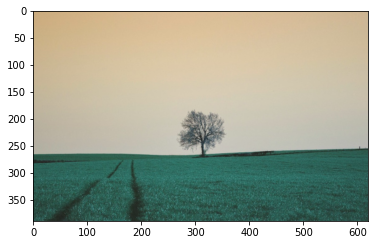

In [5]:
img = cv2.imread('/content/imagens/paisagem01.jpg')

# Plotagem da imagem. Existe uma diferença entre os canais Red e Green da imagem. 
# É necessário realizar a conversão de BGR para RGB
plt.imshow(img);

As dimensões da imagem em RGB são:  (389, 620, 3)


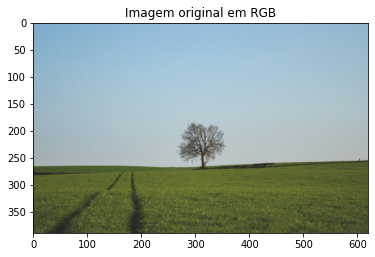

In [6]:
# Realizando a conversão de BGR para RGB com OpenCV
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrando a imagem com os canais corrigidos:
plt.title('Imagem original em RGB')
plt.imshow(img_rgb);

print('As dimensões da imagem em RGB são: ', img_rgb.shape)

### **Processo de limiarização ou binarização**

Antes de iniciar o processo de limiarização, se faz necessário realizar a conversão dos canais RGB para níveis de cinza, ou seja, a imagem que antes era representada por três canais $(x, y, z)$, agora passará a ser representada apenas por dois $(x, y)$.

As dimensões da imagem passaram a ser:  (389, 620)


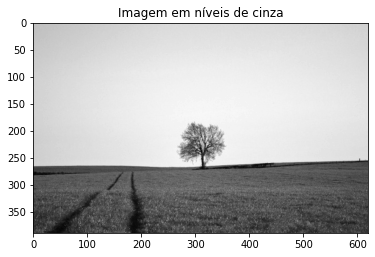

In [7]:
# Utiliza a função cvtCOLOR e o parâmetro COLOR_RGB2GRAY da biblioteca OpenCV para realizar
# a conversão da imagem para níveis de cinza.
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.title('Imagem em níveis de cinza')
plt.imshow(img_gray, cmap='gray');

print('As dimensões da imagem passaram a ser: ', img_gray.shape)

In [8]:
# variável de limiarização (podendo variar de 0 a 255):
k = 136 #@param {type: "slider", min:0, max: 255, set:1}
# realiza a binarização da imagem.
val, img_thresh = cv2.threshold(img_gray, k, 255, cv2.THRESH_BINARY)

print('O valor defeinido como limiar foi:', val)

O valor defeinido como limiar foi: 136.0


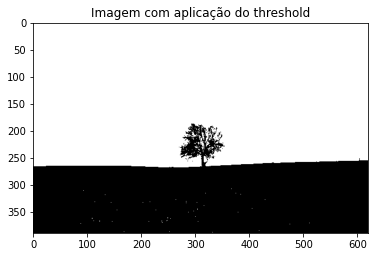

In [9]:
# resultado a imagem binarizada de acordo com a definição do limiar
plt.title('Imagem com aplicação do threshold')
plt.imshow(img_thresh, cmap='gray');


In [10]:
# criando uma função para mostrar as imagens 
def show_img(imagem, x, y, titulo):
  fig = plt.gcf()
  fig.set_size_inches(x, y)
  plt.title(titulo)
  plt.imshow(imagem, cmap='gray')

**Salvando o resultado obtido no diretório**

In [11]:
cv2.imwrite('img_thresh.jpg', img_thresh)

True

## **Tipos de limiarização (Binarização) com ``OpenCV``**

Nesta seção serão abordados outros tipos de limiarização comumente utilizadas na segmentação de imagens.

**Os resultados de cada método serão ilustrados ao fim dessa seção.**

### **THRESH_BINARY**

O método ``THRESH_BINARY`` já foi abordado anteriormente. O limiar $k$ será utilizado como padrão da binzarização.

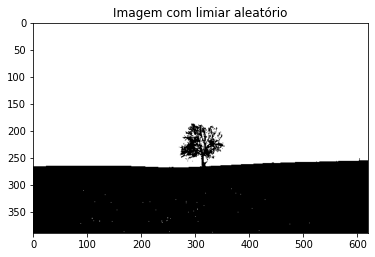

In [12]:
show_img(img_thresh, 6, 4, 'Imagem com limiar aleatório')

### **THRESH_BINARY_INV**

O ``THRESH_BINARY_INV`` como seu nome sugere, faz o oposto do ``THRESH_BINARY`` ou seja, para um limiar $k$, teremos a conversão dos seus píxels de tal forma que no intervalo $0 - k$, teremos $p = 255$ e $k - 255$, teremos $p = 0$.

Em outras palavras os valores acima de $k$ ficarão pretos e os valores abaixo de $k$ ficarão brancos.

In [13]:
# implementação do THRESH_BINARY_INV

# k = limiar (variando de 0 - 255) 
k = 136 #@param {type: "slider", min:0, max: 255, set:1}
_, img_inv = cv2.threshold(img_gray, k, 255, cv2.THRESH_BINARY_INV)

### **THRESH_TOZERO**

No ``THRESH_TOZERO`` todos os valores de píxels que estão abaixo do limiar $k$ terão valores iguais a 0, ou seja, ficarão pretos. E todos os pixels com valores maiores ou iguais a $k$ permanecerão com seus valores originais da imagem em niveis de cinza.

In [14]:
# implementação do THRESH_TOZERO

# k = limiar (variando de 0 - 255) 
k = 136 #@param {type: "slider", min:0, max: 255, set:1}
_, img_tozero = cv2.threshold(img_gray, k, 255, cv2.THRESH_TOZERO)

### **THRESH_TOZERO_INV**

O ``THRESH_TOZERO_INV`` é o contrário do ``THRESH_TOZERO``. todos os valores de píxels que estão abaixo do limiar $k$ permanecerão com seus valores originais da imagem em niveis de cinza e todos os píxels com valores iguais ou acima de $k$ terão valores iguais a 0, ou seja, ficarão pretos.

In [15]:
# implementação do THRESH_TOZERO_INV

# k = limiar (variando de 0 - 255) 
k = 136 #@param {type: "slider", min:0, max: 255, set:1}
_, img_z_inv = cv2.threshold(img_gray, k, 255, cv2.THRESH_TOZERO_INV)

### **THRESH_TRUNC**

In [16]:
# implementação do THRESH_TRUNC

# k = limiar (variando de 0 - 255) 
k = 136 #@param {type: "slider", min:0, max: 255, set:1}
_, img_trunc = cv2.threshold(img_gray, k, 255, cv2.THRESH_TRUNC)

## **Resultados obtidos**

Nesta seção serão apresentados os resultados de cada técnica implementada anteriormente.*texto em itálico*

In [17]:
# Função para plotagem de múltiplas imagens:
def showMultipleImages(imgsArray, titlesArray, size, x, y, mincolor = 0, maxcolor = 255):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, cmap = 'gray', vmin = mincolor, vmax = maxcolor);
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 12, 'fontweight': 'medium'}, pad = 5)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, cmap = 'gray', vmin = mincolor, vmax = maxcolor)
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 12, 'fontweight': 'medium'}, pad = 5)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size);
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 12, 'fontweight': 'medium'}, pad = 5)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, cmap = 'gray', vmin = mincolor, vmax = maxcolor)
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show();

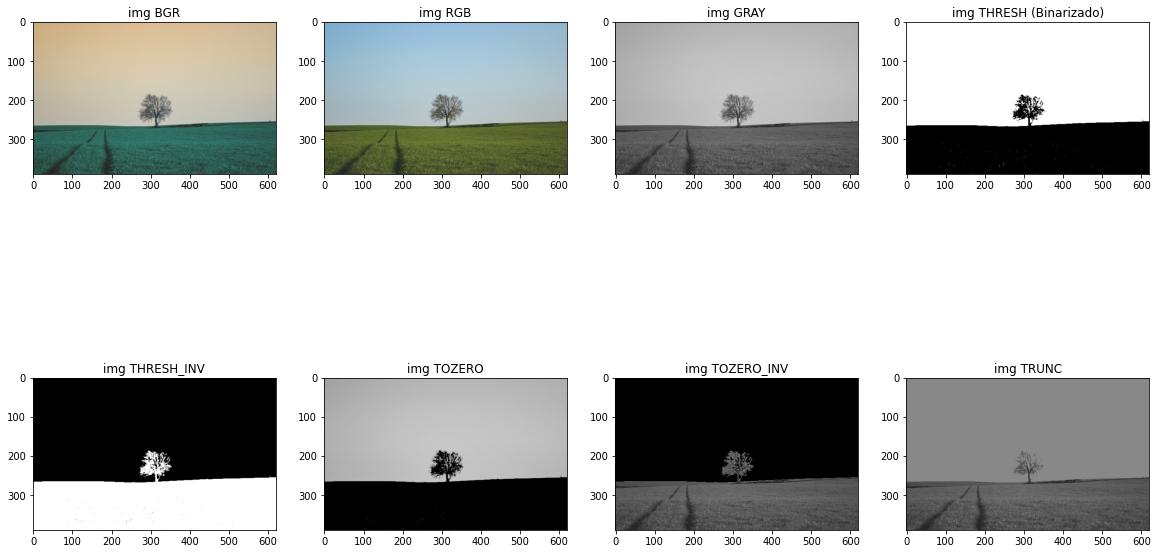

In [18]:
imgsArray = [img, img_rgb, img_gray, img_thresh, img_inv, img_tozero, img_z_inv, img_trunc]

titlesArray = ['img BGR', 'img RGB', 'img GRAY', 'img THRESH (Binarizado)', 'img THRESH_INV', 'img TOZERO', 'img TOZERO_INV', 'img TRUNC']

showMultipleImages(imgsArray, titlesArray, (20, 12), 4, 2)

## **Exemplo de limiarização em uma imagem de tomografia computadorizada**

In [70]:
# Função para realizar o processo de limiarização com os métodos já conhecidos:
def thresh_image(imagem, k):
  img = imagem
  _, img_bin = cv2.threshold(imagem, k, 255, cv2.THRESH_BINARY)
  _, img_bin_inv = cv2.threshold(imagem, k, 255, cv2.THRESH_BINARY_INV)
  _, img_tozero = cv2.threshold(imagem, k, 255, cv2.THRESH_TOZERO)
  _, img_tozero_inv = cv2.threshold(imagem, k, 255, cv2.THRESH_TOZERO_INV)
  _, img_trunc = cv2.threshold(imagem, k, 255, cv2.THRESH_TRUNC)
  
  # mostrando os resultados
  imgsArray = [img, img_bin, img_bin_inv, img_tozero, img_tozero_inv, img_trunc]
  titlesArray = ['Original', 'Threshold', 'Threshold_Inv', 'Tozero', 'Tozero_inv', 'trunc']
  showMultipleImages(imgsArray, titlesArray, (12, 8), 3, 2)

  return showMultipleImages

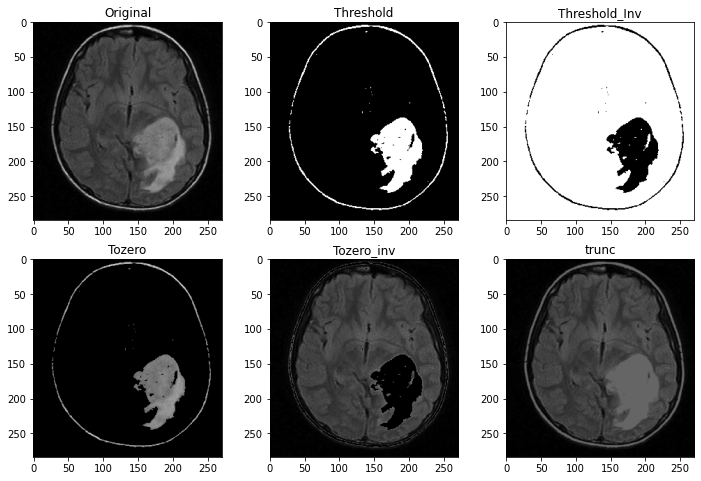

<function __main__.showMultipleImages(imgsArray, titlesArray, size, x, y, mincolor=0, maxcolor=255)>

In [71]:
# abrindo a imagem de tomografia computadorizada:
img = cv2.imread('/content/imagens/ct-scan.jpg')

# convertendo a imagem para níveis de cinza:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# chamando a função thresh_image para realizar o processo de limiarização, onde k = a definição do limiar.
thresh_image(img_gray, 101)

## **Método de Otsu para limiarização de imagens**